In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from math import isnan

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [2]:
implicit_hx1k_df = pd.read_csv("../testbench_results/implicit_hx1k_limited_size.csv")
explicit_hx1k_df = pd.read_csv("../testbench_results/explicit_hx1k_limited_size.csv")
implicit_up5k_df = pd.read_csv("../testbench_results/implicit_up5k.csv")
explicit_up5k_df = pd.read_csv("../testbench_results/explicit_up5k.csv")
implicit_up5k_pico2_df = pd.read_csv("../testbench_results/implicit_up5k_pico2.csv")
explicit_up5k_pico2_df = pd.read_csv("../testbench_results/explicit_up5k_pico2.csv")

modes = ('Implicit HX1K', 'Explicit HX1K', 'Implicit UP5K', 'Explicit UP5K', 'Implicit UP5K Pico 2', 'Explicit UP5K Pico 2')
means = {
    'Read': (
        implicit_hx1k_df[implicit_hx1k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_hx1k_df[explicit_hx1k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        implicit_up5k_df[implicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_up5k_df[explicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        implicit_up5k_pico2_df[implicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_up5k_pico2_df[explicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean()
    ),
    'Write': (
        implicit_hx1k_df[implicit_hx1k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_hx1k_df[explicit_hx1k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        implicit_up5k_df[implicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_up5k_df[explicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        implicit_up5k_pico2_df[implicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_up5k_pico2_df[explicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean()
    ),
}

print(means)

{'Read': (10268.90905448718, 10229.185496794871, 3121.8164328657313, 3107.632865731463, 3134.6188376753507, 3091.5038076152305), 'Write': (3660.417731629393, 3630.143370607029, 1488.3704590818363, 1447.183233532934, 1596.8071856287424, 1433.354890219561)}


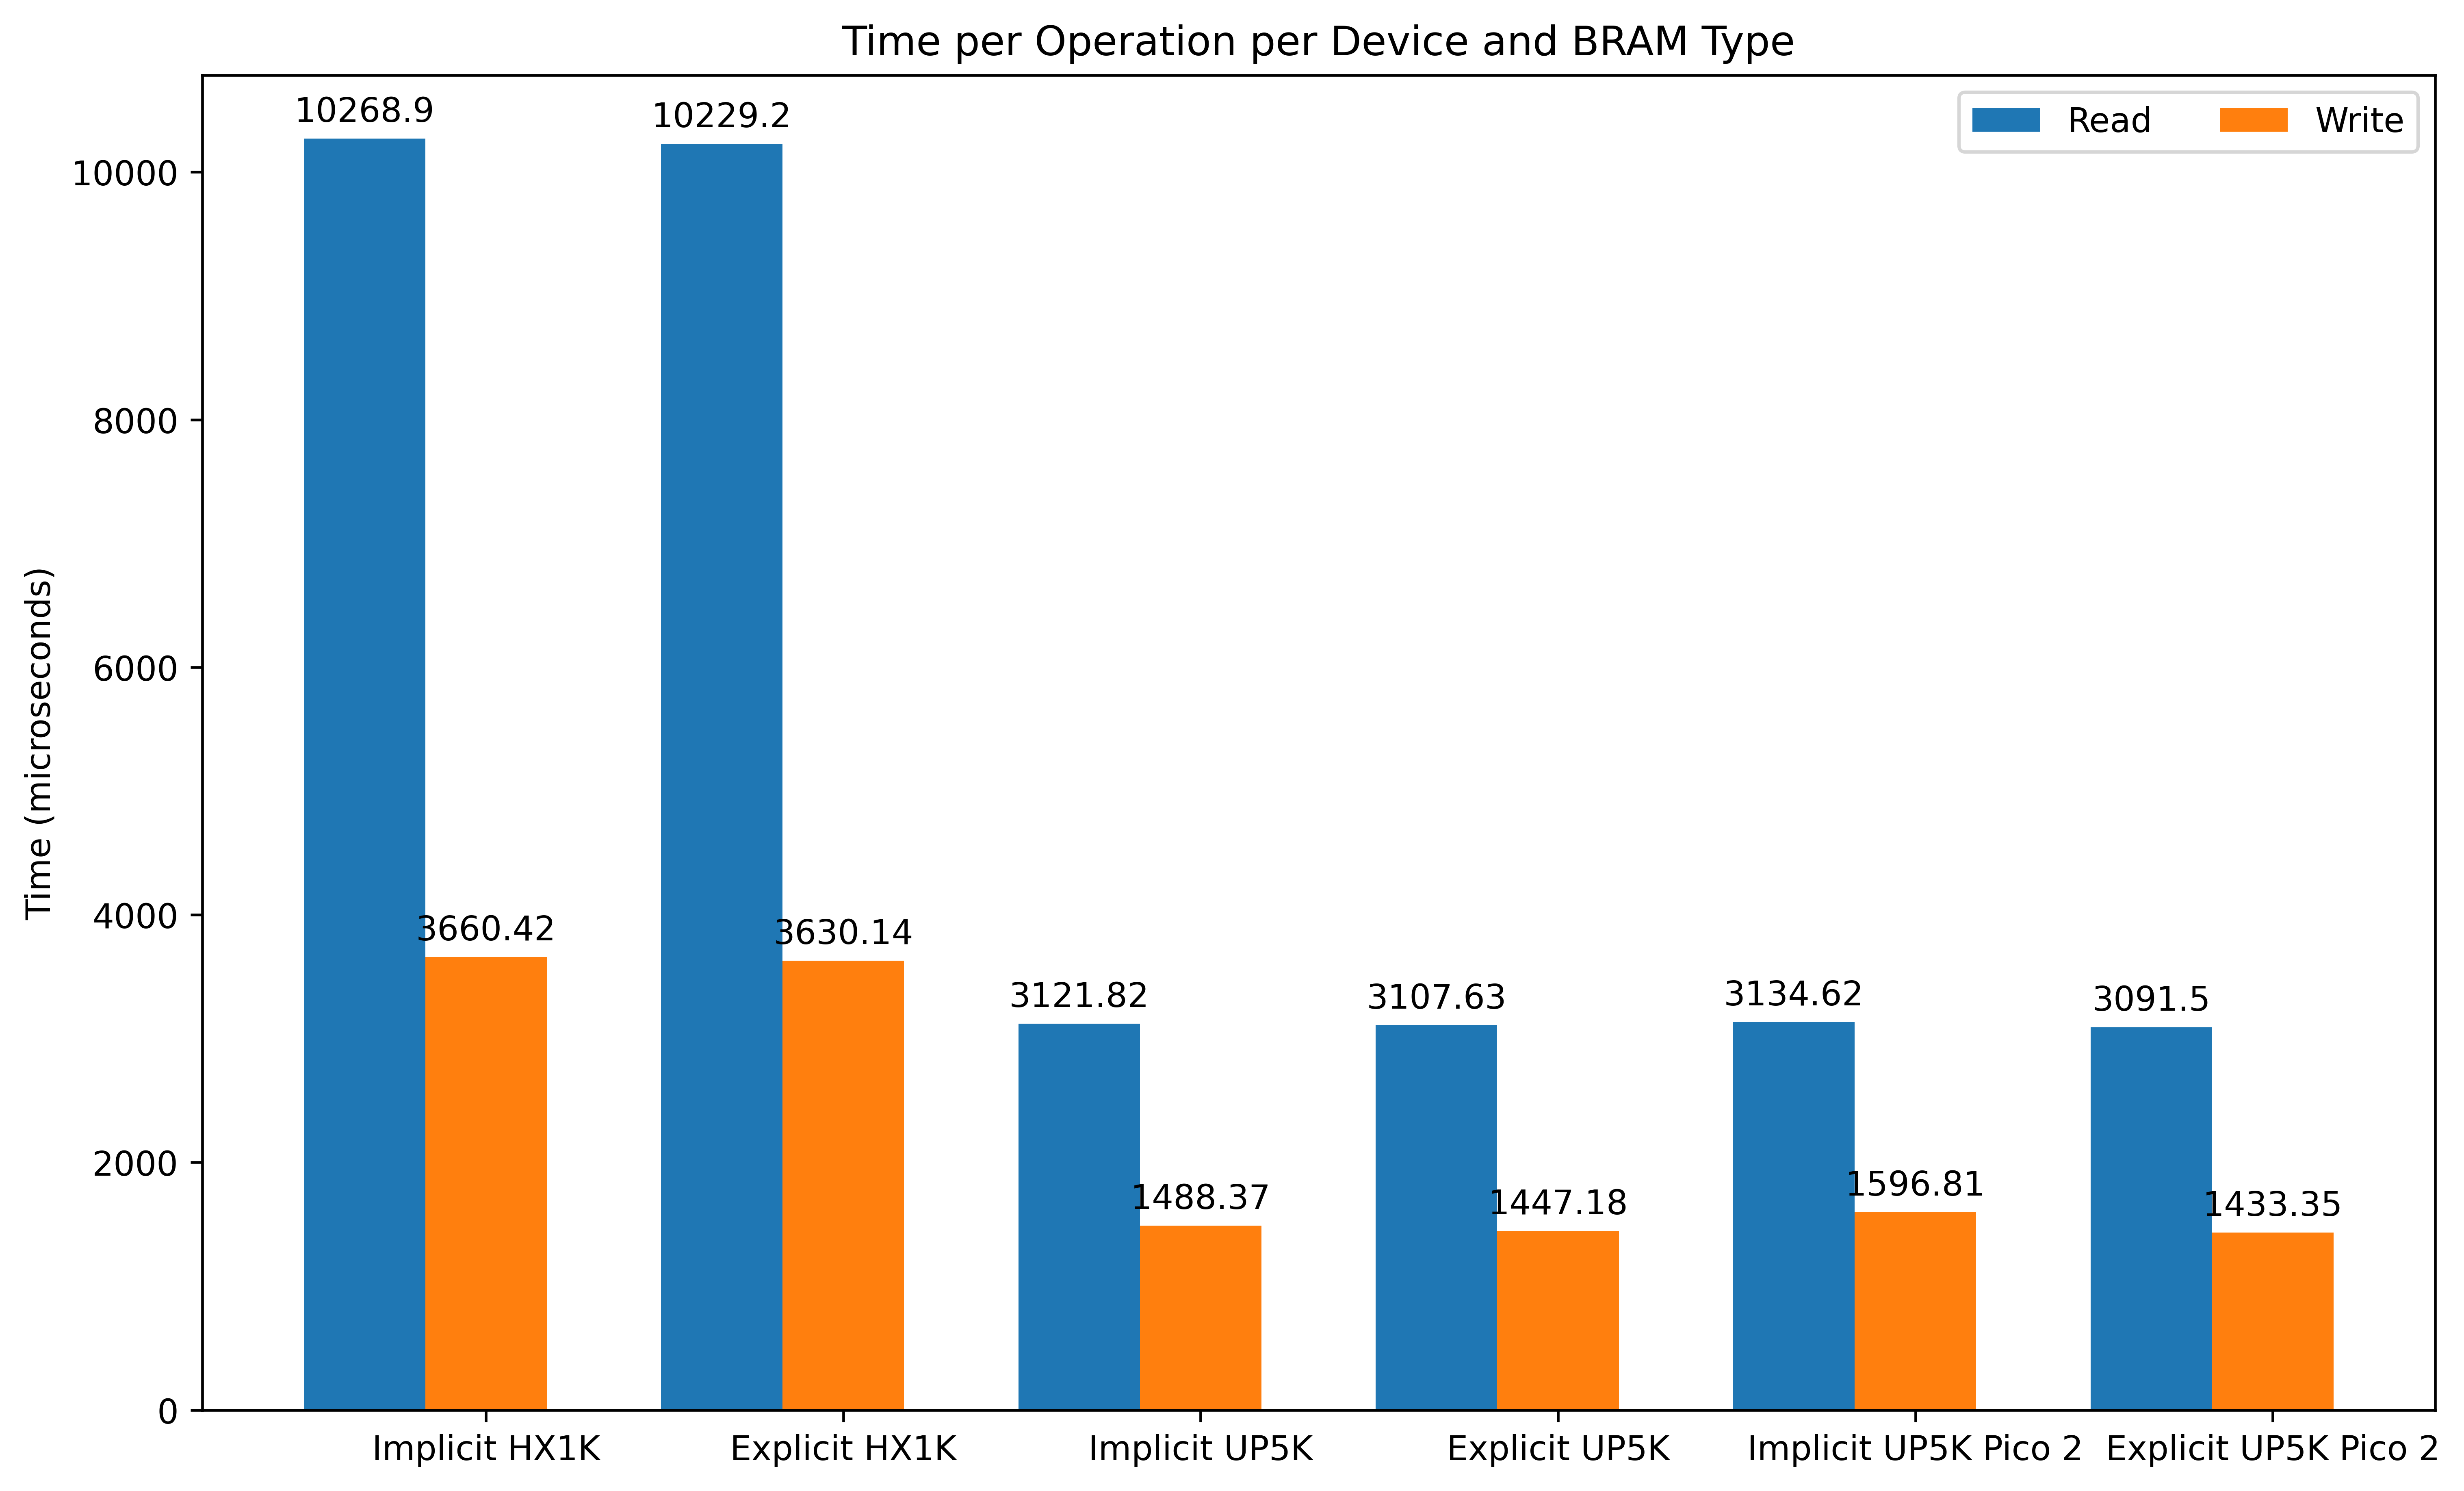

In [6]:
x = np.arange(len(modes))  # the label locations
width = 0.34  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', dpi=600, figsize=(10,6))

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (microseconds)')
ax.set_title('Time per Operation per Device and BRAM Type')
ax.set_xticks(x + width, modes)
ax.legend(loc='upper right', ncols=2)

plt.show()